<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Missing Value Imputation</h1>
</div>

© Copyright Machine Learning Plus

__Imputation means you replace or fill the missing value with any guessed or estimated value__

While working on real world datasets, it's very common to have some missing values in the dataset. There are various reasons for it. It can be because some data gathering system was not working properly or it was because of some manual mistake. It's very important to impute the missing values before building the machine learning models, at least several of them. 

### Why should you impute the missing values?

Missing values present in the data, comes equipped with various problems. There are lot of issues with missing values. Some of those are
- Lot ML and Statistical algorithms are not designed in a way to treat the missing values by itself. So these algorithms will throw an error if you have missing values
- Missing values reduces the statistical power of the hypothesis tests
- Missing values can lead to bias in the data and you might now be able to predict/forecast correctly

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Representing Missing Values</h2>
</div>

The usual way of representing missing values in Python is `None`.

However there are multiple ways to represent missing data in NumPy and Pandas. 

NumPy provides `np.nan` for float and objects. 

Pandas provides pd.NA for generalise missing data and pd.NaT (not a time) for missing time data.

In [6]:
import numpy as np
import pandas as pd
import random

In [7]:
# Numpy
np.nan

nan

In [8]:
# Pandas
pd.NA

<NA>

In [9]:
# Missing Time
pd.NaT

NaT

__Careful when using mising values for comparisons__

In [10]:
np.nan == np.nan

False

In [11]:
np.nan in [np.nan]

True

In [12]:
np.nan is np.nan

True

In [13]:
pd.NA == pd.NA

<NA>

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Types of missing values and causes of missing values</h2>
</div>

## 2.1. Types of missing values

### Missing completely at random(MCAR)

The probability of missing values in a variable is the same for all samples. For example, when a survey is conducted, and values were just randomly missed when being entered in the computer or a respondent chose not to respond to a question.

There is no effect of MCAR on inferences made by a model trained on such data

In [14]:
import pandas as pd
df = pd.read_csv('C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Missing at random(MAR)

The probability of missing values, at random, in a variable depends on the available information in other predictors. 

That is, when it is possible to predict the missing value based on other variable(s), we call it __missing at random (MAR)__.

For example, when men and women respond to the question “have you ever taken parental leave?”, men would tend to ignore the question at a different rate compared to women.

MARs may be handled by using the information in the other predictors to build a model and impute a value for the missing entry

### Missing not at random(MNAR)

The probability of missing values, not at random, depends on information that has not been recorded, and this information also predicts the missing values. 

For example, the revenue field contained missing values on a non-working day. It could be because there was no revenue on that day and could replaced with zero value.

Or if there were multiple versions of survey questions sent, and the recently added questions might have missing values in old surveys.

MNARs can be handled by studying the root cause of missing and replacing with an appropriate value. Generally there isn't much effect of MNAR on inferences made by a model trained on such data. But again, there can be few exceptions.


## 2.2. Causes of Missing Values
- Data might not be available for the complete time period of analysis
- Non-occurance of events
- People skipped response for some questions of the survey
- Non-applicability of questions in the survery
- Missing out at random

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Identify missing values</h2>
</div>

In [15]:
# import necessary libraries 
import numpy as np 
import pandas as pd 

### Check and Select for Null Values

In [16]:
df = pd.read_csv("C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/titanic_missing.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        50 non-null     int64  
 1   PassengerId  50 non-null     int64  
 2   Survived     50 non-null     int64  
 3   Pclass       50 non-null     int64  
 4   Name         50 non-null     object 
 5   Sex          41 non-null     object 
 6   Age          35 non-null     float64
 7   SibSp        50 non-null     int64  
 8   Parch        50 non-null     int64  
 9   Ticket       50 non-null     object 
 10  Fare         40 non-null     float64
 11  Cabin        12 non-null     object 
 12  Embarked     50 non-null     object 
dtypes: float64(2), int64(6), object(5)
memory usage: 5.2+ KB


In [18]:
df.isnull().head(10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,True,True,False


In [19]:
df.notnull().head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,False,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True


In [20]:
df['Age'].head()

0     2.0
1    19.0
2    27.0
3    50.0
4    39.0
Name: Age, dtype: float64

### Find share of missing values

In [21]:
df.isnull().sum()

index           0
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             9
Age            15
SibSp           0
Parch           0
Ticket          0
Fare           10
Cabin          38
Embarked        0
dtype: int64

In [22]:
# missing data in column
total_count = df.isnull().sum(axis=0).sort_values(ascending=False)
percent_count = ((df.isnull().sum(axis=0)/df.isnull().count(axis=0))*100).sort_values(ascending=False)


In [23]:
missing_data_columns = pd.concat([total_count, percent_count], axis=1, keys=['Total_count', 'Percent_count'])
missing_data_columns

,Total_count,Percent_count
Cabin,38,76.0
Age,15,30.0
Fare,10,20.0
Sex,9,18.0
index,0,0.0
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
SibSp,0,0.0


### Mini Challenge

Count the total number of missing values in each column of `df`

```python
import pandas as pd
import numpy as np

df = pd.read_csv('Datasets\Titanic.csv').sample(50, random_state=100)

n_missing = np.random.randint(4, 15, 1)

for i in range(n_missing):
    row = np.random.randint(1, df.shape[0])
    df.at[row, "Age"] = pd.NA

    
for i in range(n_missing):
    row = np.random.randint(1, df.shape[0])
    df.at[row, "Fare"] = pd.NA
    
for i in range(n_missing):
    row = np.random.randint(1, df.shape[0])
    df.at[row, "Sex"] = pd.NA
```

Code URL: https://git.io/JswTN

In [24]:
# Solution
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/titanic.csv').sample(50, random_state=100)


In [25]:
n_missing = np.random.randint(4, 15, (1))[0]
print(n_missing)

for i in range(n_missing):
    row = np.random.randint(1, df.shape[0], (1))[0]
    df.at[row, "Age"] = pd.NA

for i in range(n_missing):
    row = np.random.randint(1, df.shape[0], (1))[0]
    df.at[row, "Fare"] = pd.NA
    
for i in range(n_missing):
    row = np.random.randint(1, df.shape[0], (1))[0]
    df.at[row, "Sex"] = pd.NA

12


In [26]:
df.isna().sum()


PassengerId    28
Survived       28
Pclass         28
Name           28
Sex            28
Age            37
SibSp          28
Parch          28
Ticket         28
Fare           28
Cabin          66
Embarked       28
dtype: int64

In [27]:
df.isna().sum().sum()

383

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
205,206.0,0.0,3.0,"Strom, Miss. Telma Matilda",female,2.0,0.0,1.0,347054,10.4625,G6,S
44,45.0,1.0,3.0,"Devaney, Miss. Margaret Delia",female,19.0,0.0,0.0,330958,7.8792,NaN,Q
821,822.0,1.0,3.0,"Lulic, Mr. Nikola",male,27.0,0.0,0.0,315098,8.6625,NaN,S
458,459.0,1.0,2.0,"Toomey, Miss. Ellen",female,50.0,0.0,0.0,F.C.C. 13531,10.5000,NaN,S
795,796.0,0.0,2.0,"Otter, Mr. Richard",male,39.0,0.0,0.0,28213,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.isna().sum()

PassengerId    28
Survived       28
Pclass         28
Name           28
Sex            28
Age            37
SibSp          28
Parch          28
Ticket         28
Fare           28
Cabin          66
Embarked       28
dtype: int64

In [30]:
print("gives total no of rows with nan/na values")
sum(map(any, df.isna()))

print(f'there are {sum(map(any, df.isna()))} no of rows with nan values which consititute {(sum(map(any, df.isna()))/df.shape[0])*100}% of total data ')

gives total no of rows with nan/na values
there are 12 no of rows with nan values which consititute 15.384615384615385% of total data 


In [31]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Visualize missing values using Missingo</h2>
</div>

In [32]:
import missingno as msno # to visualize missing value

In [33]:
df = pd.read_csv("C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/titanic_missing.csv")

<Axes: >

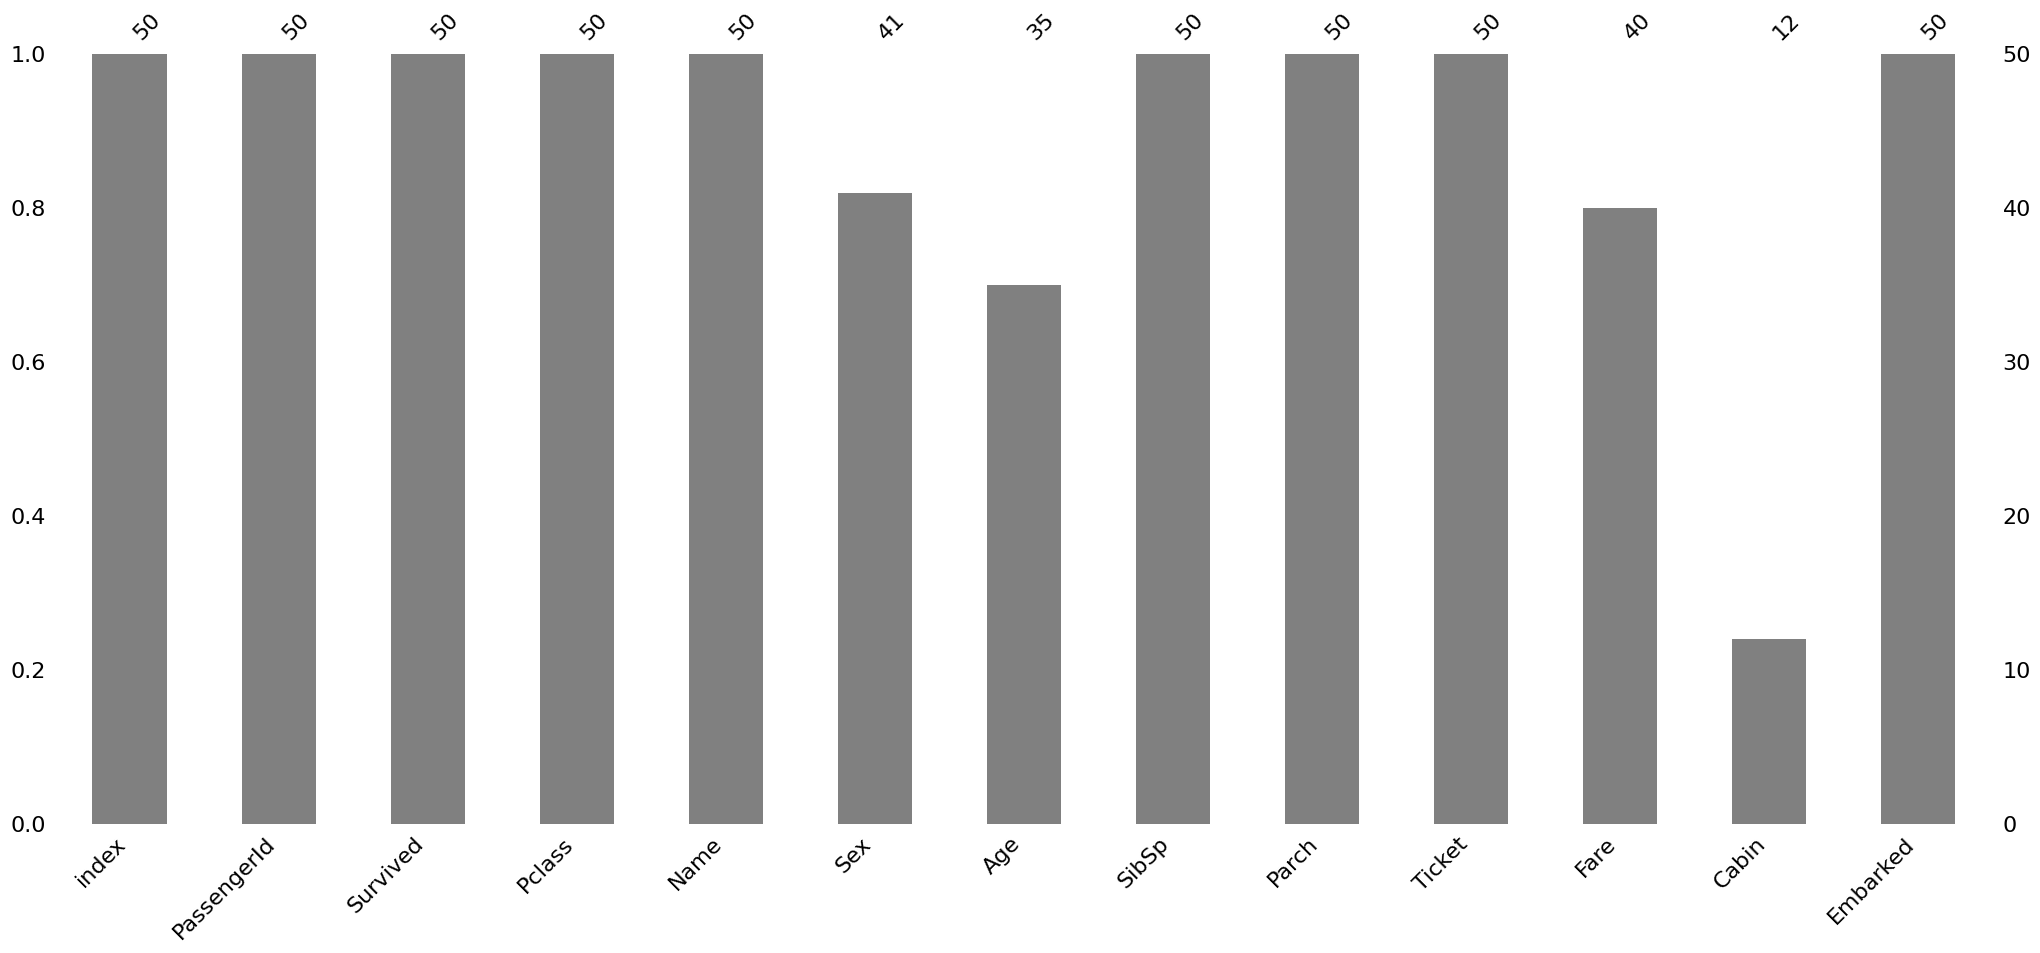

In [34]:
msno.bar(df,color='gray')

The missingness matrix shows the missing values in the dataset. The sparkle line on the right shows how many of the columns in a given row is missing.

<Axes: >

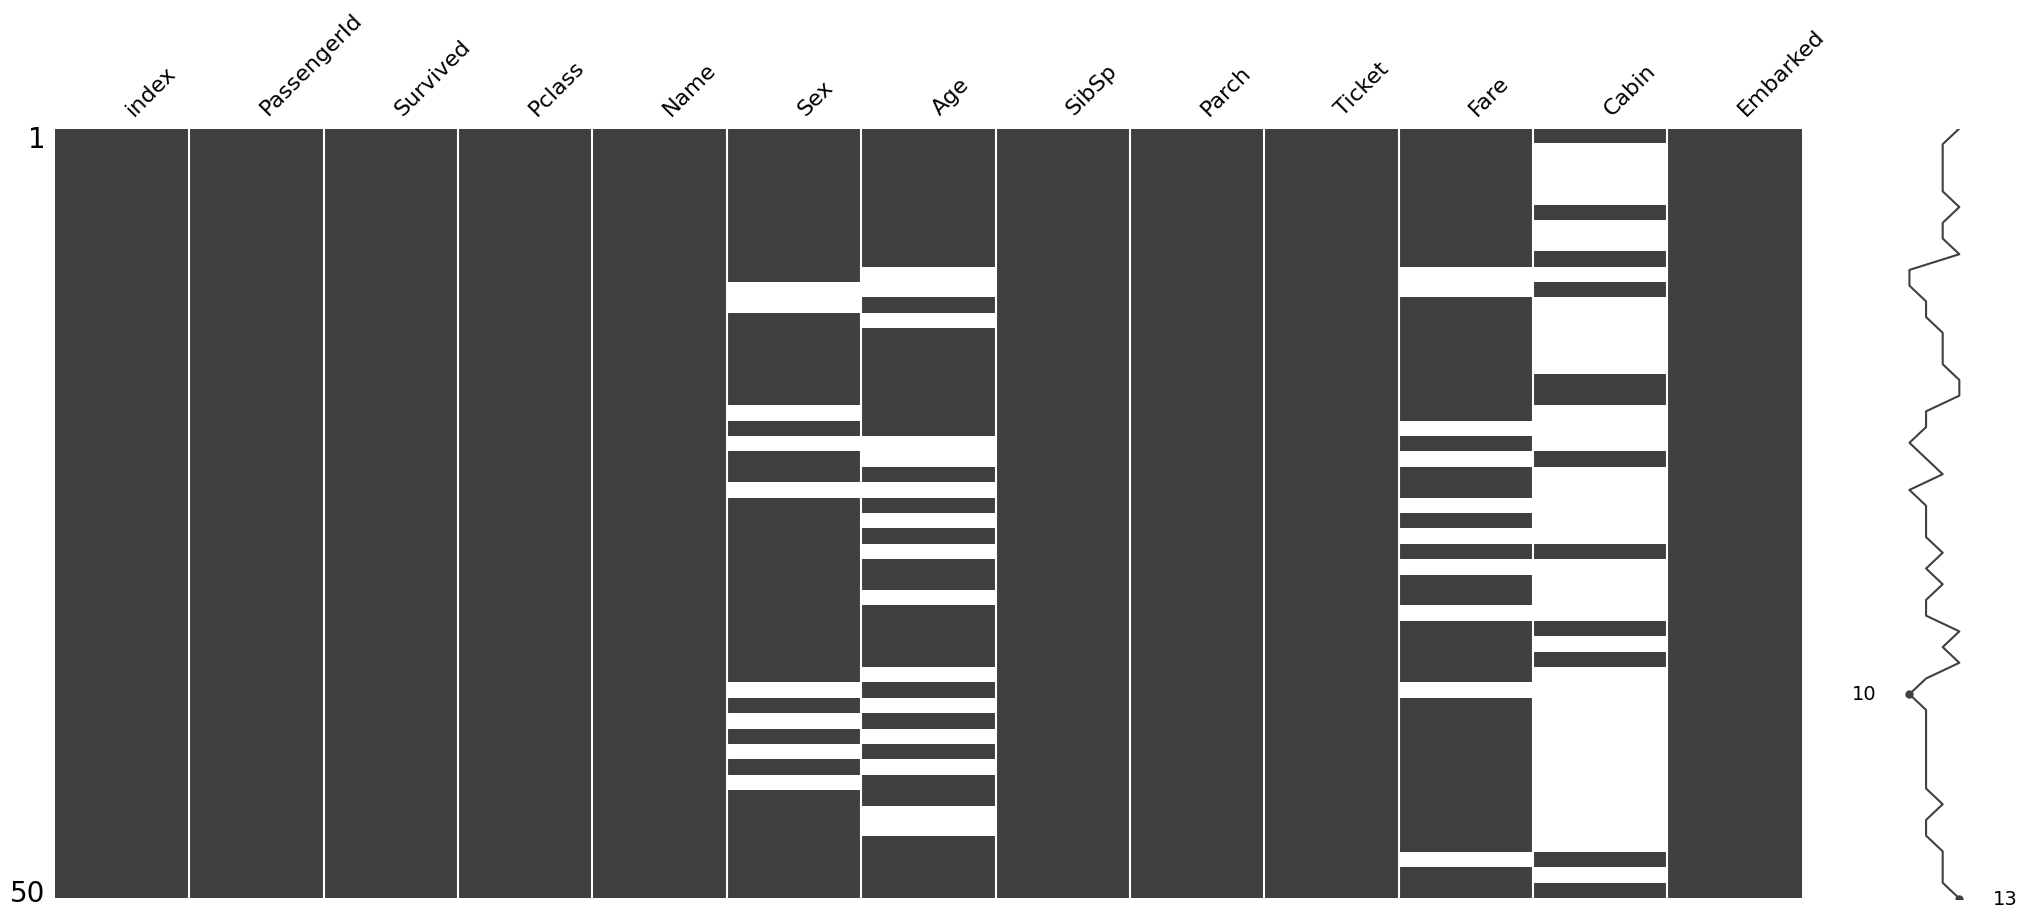

In [35]:
msno.matrix(df)

__Correlation of missing values amongst columns__: A high correlation would mean the missingness of values in one column is related to the missingness of values in another column.

<Axes: >

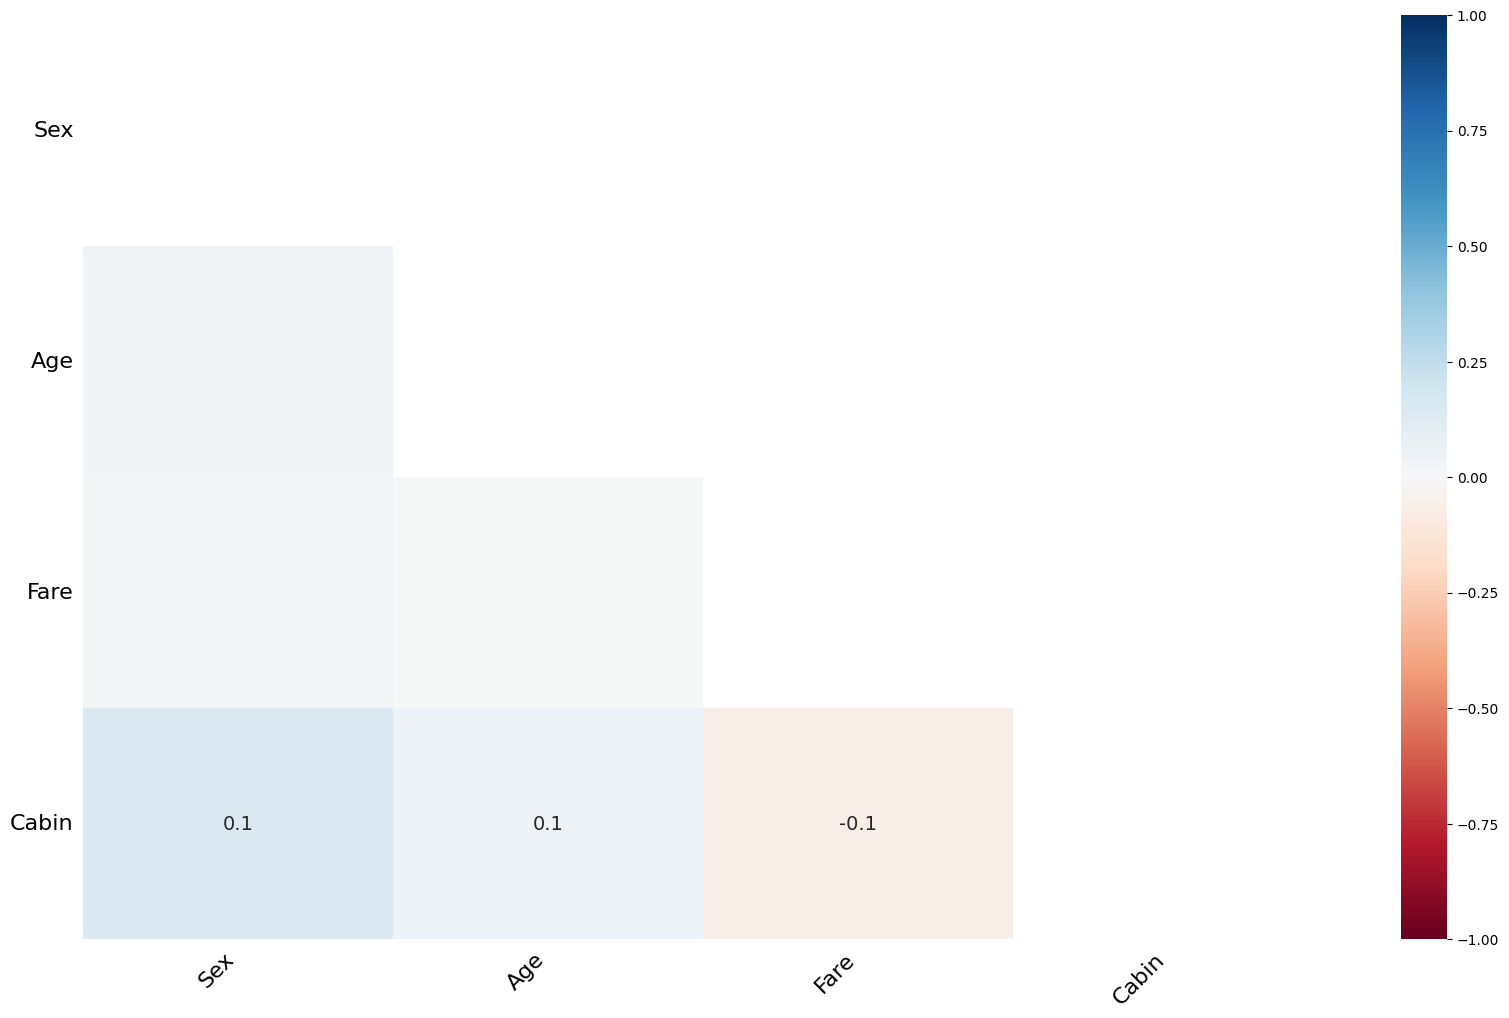

In [36]:
msno.heatmap(df)

In [37]:
df.head(10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
4,795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. When to drop features and when to drop rows</h2>
</div>

### Rows
If the proportion of rows with missing values is relatively small to the entire dataset, and you have a sufficiently large number of complete rows that fairly represents various cases, you can probably afford to drop the rows with missing values. 

It usually does not affect the performance of model much. But if the proportion is high (approx >5%) don't drop the rows as you might loose a heavy chunk of training data. 

### Features / Columns

If a feature has too many null values and imputing the data might give unrealistic values, dropping the feature might be a suitable option. 

But you need to be very cautious about it and try to understand what could be the reason behind null values. 

In case of classification problems where the class is imbalanced, these kind of features turn out to be very important. Before removing or imputing, you can also create a new feature stating if the value in a given feature was missing or not. It might serve as useful information for ML as well.

Ex. While dealing with the problem of credit card fraud detection, if the 'alternate contact number' feature contains missing values, it increases the chance that the account is not genuine.

__Drop rows that contain missing values in `Age`__

In [38]:
# Drop rows that contain missing values in Age

df[df['Age'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 49
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        35 non-null     int64  
 1   PassengerId  35 non-null     int64  
 2   Survived     35 non-null     int64  
 3   Pclass       35 non-null     int64  
 4   Name         35 non-null     object 
 5   Sex          29 non-null     object 
 6   Age          35 non-null     float64
 7   SibSp        35 non-null     int64  
 8   Parch        35 non-null     int64  
 9   Ticket       35 non-null     object 
 10  Fare         28 non-null     float64
 11  Cabin        9 non-null      object 
 12  Embarked     35 non-null     object 
dtypes: float64(2), int64(6), object(5)
memory usage: 3.8+ KB


Drop rows that contain missing values in `Age` or `Fare` 

In [39]:
df_ageFare=df[(df['Age'].notnull()) | df['Fare'].notnull()]

<Axes: >

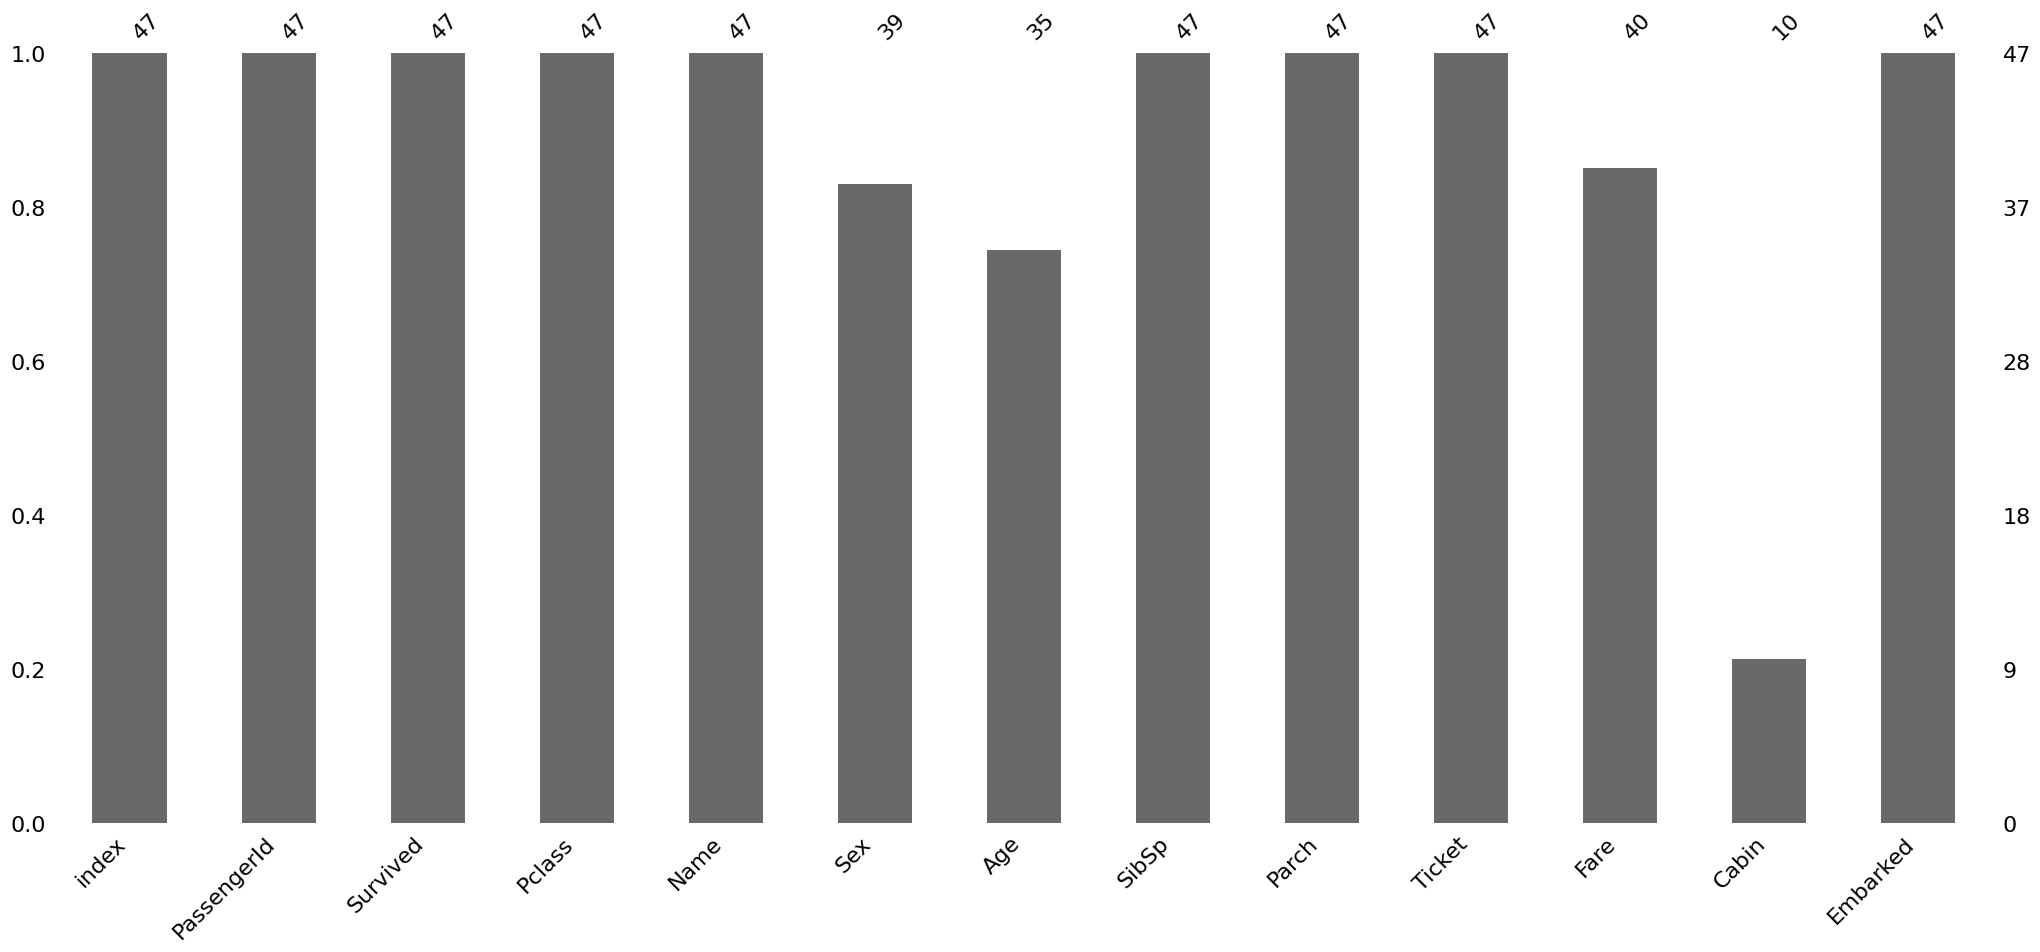

In [40]:
msno.bar(df_ageFare)

since we have very less training data we can not drop any more columns/rows and rather impute the data 

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Approaches to Filling Data</h2>
</div>

Depending on the context you can fill missing data with a standard, meaningful value.

Some common methods are, filling the missing with:
1. __Zero__ (Ex: if the 'Fare' data was missing, it could be possible that the person did not pay anything, in which case replacing with zero makes sense.)

2. __Most Frequent Observation__ : For Categorical data

3. __Standard String__ : For Categorical data

4. __Mean / Median__ of the entire data / appropriate group

5. __Interpolation__ on case basis. Ex: Sequence data with trend

6. __Forward Fill / Backward Fill__ for Sequential Data

7. __Predicting the missing values__

In [41]:
import pandas as pd
import numpy as np

In [42]:
df 
df.head(20)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.8792,NaN,Q
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.5000,NaN,S
4,795,796,0,2,"Otter, Mr. Richard",male,39.00,0,0,28213,13.0000,NaN,S
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,NaN,S
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.9000,NaN,S
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S


### 6.1. Fill with Zero

In [43]:
# Fill all NA with 0
#df.Fare.fillna(0)
df['Fare'].fillna(0)

0      10.4625
1       7.8792
2       8.6625
3      10.5000
4      13.0000
5     247.5208
6      20.2125
7      46.9000
8     135.6333
9       0.0000
10      0.0000
11      7.2500
12     21.0000
13      9.4750
14     21.0750
15      7.2250
16     90.0000
17     26.2875
18     14.5000
19      0.0000
20      7.8958
21      0.0000
22      8.0500
23      7.2500
24      0.0000
25      8.0500
26      0.0000
27     30.0000
28      0.0000
29      6.7500
30     69.5500
31      0.0000
32     26.5500
33     13.0000
34     57.0000
35      7.8542
36      0.0000
37    133.6500
38     19.5000
39      7.7750
40      9.8250
41    110.8833
42     27.0000
43     20.5750
44     69.5500
45      7.2250
46      7.9250
47      0.0000
48     26.0000
49     78.2667
Name: Fare, dtype: float64

### 6.2. Fill with the most frequent value

It may not be appropriate to fill categorical / string data with 0's. For categorical the common practice it to fill it up with the most frequent value (in the entire dataset or in a given group).

In [44]:
# Fill with the most frequent value
df.Sex.value_counts()

male      23
female    18
Name: Sex, dtype: int64

In [45]:
most_frequent = df.Sex.value_counts().index[0]
most_frequent

'male'

In [46]:
df['Sex'].fillna(most_frequent).head(10)

0    female
1    female
2      male
3    female
4      male
5      male
6      male
7    female
8    female
9    female
Name: Sex, dtype: object

### 6.3. Fill with a standard string

In [47]:
df['Sex'] = df['Sex'].fillna("do not want to disclose")

In [48]:
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.8792,NaN,Q
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.5000,NaN,S
4,795,796,0,2,"Otter, Mr. Richard",male,39.00,0,0,28213,13.0000,NaN,S
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,NaN,S
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.9000,NaN,S
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S


Alternately, a smarter way is to check the Salutation in the 'Name' column. If it is 'Mr', then 'male' else 'female'.

### 6.4. Fill with the Mean or the Median

- __If the data were missing completely at random__, then mean /median imputation might be suitable. You might also want to capture if the data was originally missing or not by creating a “missing indicator” variable. 

  Both methods are extremely straight forward to implement. 
   

- __If a variable is normally distributed__, the mean, median, and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are almost equivalent. 

  Replacing missing data by the mode is not common practice for numerical variables.


-  __If the variable is skewed__, the mean is biased by the values at the far end of the distribution. 

   Therefore, the median is a better representation of the majority of the values in the variable.
   
Having said that, you should avoid filling with mean, if you observe and increasing or decreasing trend in your data, in which case you might want to consider 'interpolation' and predicting the missing value.

Fig shows that fare data is not normally distributed


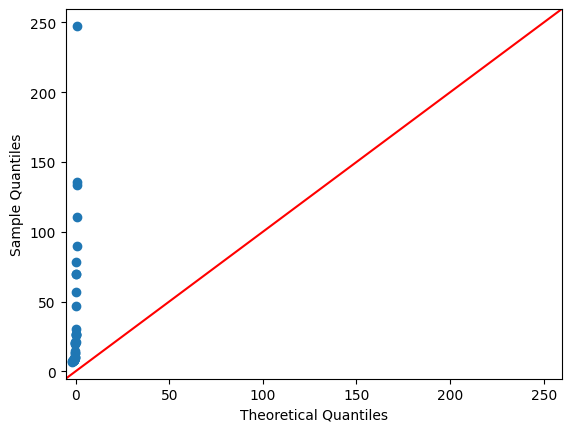

In [49]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig= sm.qqplot(df['Fare'],line='45')
print("Fig shows that fare data is not normally distributed")

In [50]:
# Mean value
mean_val = df['Fare'].mean()
df['Fare'].fillna(mean_val).head(10)

0     10.462500
1      7.879200
2      8.662500
3     10.500000
4     13.000000
5    247.520800
6     20.212500
7     46.900000
8    135.633300
9     36.442707
Name: Fare, dtype: float64

__Fill with the Mean or the Median by group__

In [51]:
df.groupby('Pclass')['Fare']

In [52]:
# Mean value by group
df['Fare_by_Class'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.mean())
df.head(15)


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_by_Class
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,17.155305
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,17.155305
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S,17.155305
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S,18.062500
4,795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,18.062500
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,93.579160
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S,17.155305
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S,17.155305
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,93.579160
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S,17.155305


In [53]:
df['Fare_imputed'] = np.where(np.isnan(df['Fare']), df['Fare_by_Class'], df['Fare'])
df.head(15)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_by_Class,Fare_imputed
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,17.155305,10.462500
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,17.155305,7.879200
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S,17.155305,8.662500
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S,18.062500,10.500000
4,795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,18.062500,13.000000
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,93.579160,247.520800
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S,17.155305,20.212500
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S,17.155305,46.900000
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,93.579160,135.633300
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S,17.155305,17.155305


In [54]:
df= pd.read_csv("C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/titanic_missing.csv")
df
df_new=df[(df['Sex'].notnull()|df['Fare'].notnull())]
df_new['Fare_by_sex']=df_new.groupby("Sex")['Fare'].transform(lambda x: x.mean())


C:\Users\maste\AppData\Local\Temp\ipykernel_62524\1612321439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Fare_by_sex']=df_new.groupby("Sex")['Fare'].transform(lambda x: x.mean())


In [55]:
df_new

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_by_sex
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S,55.303846
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.8792,NaN,Q,55.303846
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S,32.276875
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.5000,NaN,S,55.303846
4,795,796,0,2,"Otter, Mr. Richard",male,39.00,0,0,28213,13.0000,NaN,S,32.276875
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,32.276875
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,NaN,S,32.276875
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.9000,NaN,S,55.303846
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S,55.303846
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S,55.303846


In [56]:
df_new['Fare_imputed']=np.where(np.isnan(df_new['Fare']),df_new['Fare_by_sex'],df_new['Fare'])

C:\Users\maste\AppData\Local\Temp\ipykernel_62524\3255816542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Fare_imputed']=np.where(np.isnan(df_new['Fare']),df_new['Fare_by_sex'],df_new['Fare'])


In [57]:
df_new

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_by_sex,Fare_imputed
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S,55.303846,10.462500
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.8792,NaN,Q,55.303846,7.879200
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S,32.276875,8.662500
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.5000,NaN,S,55.303846,10.500000
4,795,796,0,2,"Otter, Mr. Richard",male,39.00,0,0,28213,13.0000,NaN,S,32.276875,13.000000
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,32.276875,247.520800
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,NaN,S,32.276875,20.212500
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.9000,NaN,S,55.303846,46.900000
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S,55.303846,135.633300
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S,55.303846,55.303846


### 6.5. Interpolation

Be careful with this technique, you should try to really understand whether or not this is a valid choice for your data. You should also know there are multiple interpolation methods available, the default is a linear method.

In [58]:
fare = {'first_class':100, 'second_class':np.nan, 'third_class':60, 'open_class':20}

In [59]:
ser = pd.Series(fare)

In [60]:
ser

first_class     100.0
second_class      NaN
third_class      60.0
open_class       20.0
dtype: float64

By default, `ser.interpolate()` will do a linear interpolation.

Linear interpolation will take the index (0,1,2..) as the X and the column you want to interpolate as Y and do the interpolation. So, you need to make sure the X is sorted in your data to make this work.

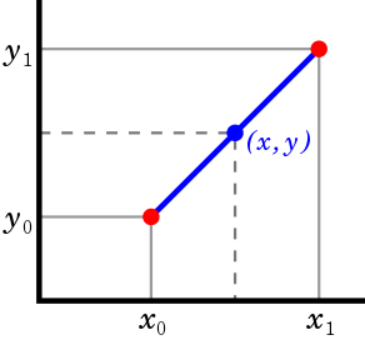

Source: Wikipedia

In [76]:
ser.interpolate()

first_class     100.0
second_class     80.0
third_class      60.0
open_class       20.0
dtype: float64

You could explore other methods as well, such as 'spline'.

In [77]:
ser.reset_index()

,index,0
0,first_class,100.0
1,second_class,NaN
2,third_class,60.0
3,open_class,20.0


In [78]:
ser.reset_index().interpolate(method='spline', order=2)

,index,0
0,first_class,100.000000
1,second_class,86.666667
2,third_class,60.000000
3,open_class,20.000000


What if you have a it as a Dataframe?

Works as well. But take care of the index.

In [79]:
df = pd.DataFrame(ser,columns=['Fare'])

In [80]:
df

,Fare
first_class,100.0
second_class,NaN
third_class,60.0
open_class,20.0


In [81]:
df.interpolate()

,Fare
first_class,100.0
second_class,80.0
third_class,60.0
open_class,20.0


In [82]:
df = df.reset_index()

In [83]:

df

,index,Fare
0,first_class,100.0
1,second_class,NaN
2,third_class,60.0
3,open_class,20.0


In [84]:
df.interpolate(method='spline',order=2)

,index,Fare
0,first_class,100.000000
1,second_class,86.666667
2,third_class,60.000000
3,open_class,20.000000


### Challenge

Impute the missing values in `Fare` column in dataframe df using linear interpolation.

```python
import pandas as pd
import numpy as np

df = pd.read_csv('../Datasets/titanic_missing.csv')
```

Link: https://bit.ly/3i0EA4z


In [85]:
df = pd.read_csv("C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/titanic_missing.csv")

In [86]:
df_new= df.loc[:,['Pclass','Fare']]
df_new1=df_new.interpolate()

In [87]:
df_new2= df.loc[:,['Pclass','Fare']].sort_values('Pclass').interpolate()
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 49 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  50 non-null     int64  
 1   Fare    50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [88]:
df_compare=pd.concat([df_new1,df_new2],axis=1)
df_compare

,Pclass,Fare,Pclass,Fare
0,3,10.462500,3,10.462500
1,3,7.879200,3,7.879200
2,3,8.662500,3,8.662500
3,2,10.500000,2,10.500000
4,2,13.000000,2,13.000000
5,1,247.520800,1,247.520800
6,3,20.212500,3,20.212500
7,3,46.900000,3,46.900000
8,1,135.633300,1,135.633300
9,3,92.838867,3,27.075000


In [89]:
# Solution
import pandas as pd
import numpy as np

df = pd.read_csv('../Datasets/titanic_missing.csv')
df.head(15)

FileNotFoundError: [Errno 2] No such file or directory: '../Datasets/titanic_missing.csv'

In [90]:
# Linear
linear = df.loc[:, ['Pclass', 'Fare']].interpolate()
linear.head(15)

,Pclass,Fare
0,3,10.462500
1,3,7.879200
2,3,8.662500
3,2,10.500000
4,2,13.000000
5,1,247.520800
6,3,20.212500
7,3,46.900000
8,1,135.633300
9,3,92.838867


__Sort data s per Pclass and interpolate__

In [91]:
# Linear
linear2 = df.loc[:, ['Pclass', 'Fare']].sort_values('Pclass').interpolate()
linear2[:20]

,Pclass,Fare
49,1,78.266700
32,1,26.550000
41,1,110.883300
37,1,133.650000
21,1,119.100000
10,1,104.550000
16,1,90.000000
8,1,135.633300
34,1,57.000000
5,1,247.520800


__Put them together and compare.__

In [92]:
pd.concat([df.loc[:, ['Pclass', 'Fare']], linear, linear2], axis=1)

,Pclass,Fare,Pclass,Fare,Pclass,Fare
0,3,10.4625,3,10.462500,3,10.462500
1,3,7.8792,3,7.879200,3,7.879200
2,3,8.6625,3,8.662500,3,8.662500
3,2,10.5000,2,10.500000,2,10.500000
4,2,13.0000,2,13.000000,2,13.000000
5,1,247.5208,1,247.520800,1,247.520800
6,3,20.2125,3,20.212500,3,20.212500
7,3,46.9000,3,46.900000,3,46.900000
8,1,135.6333,1,135.633300,1,135.633300
9,3,NaN,3,92.838867,3,27.075000


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7. Iterative Imputer with MICE</h2>
</div>

You can also impute missing values by predicting it using other features from the dataset. 

The MICE or 'Multiple Imputations by Chained Equations', aka, 'Fully Conditional Specification' is a popular approach to do this. This is quite popular in the R programming language with the mice package. It is currently under experimental implemetation in Python via the `sklearn` package's `IterativeImputer`. `fancyimpute` is another nice package that implements this.

You basically take the variable that contains missing values as response 'Y' and other variables as predictors 'X'. Build a model with rows where Y is not missing, then predict the missing observations. This this multiple times by doing random draws of the data and take the mean of the predictions.

__The Method__

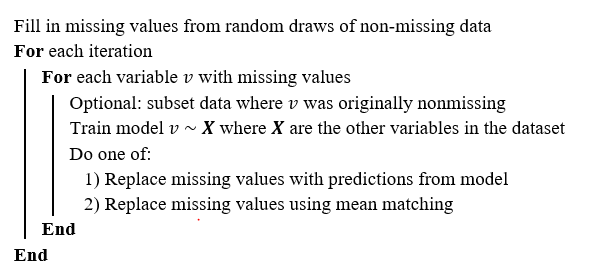

__Import Data__

In [93]:
import pandas as pd
import numpy as np

In [94]:
df = pd.read_csv("C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/titanic_missing.csv")
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.8792,NaN,Q
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.5000,NaN,S
4,795,796,0,2,"Otter, Mr. Richard",male,39.00,0,0,28213,13.0000,NaN,S
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.2125,NaN,S
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.9000,NaN,S
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S


__Sklearn Iterative Imputer with MICE__

Multiple Imputation by Chained Equations, also called “fully conditional specification”.

In [95]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [96]:
pip --version

pip 23.1.2 from C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\pip (python 3.11)Note: you may need to restart the kernel to use updated packages.




In [97]:
# need to enable iterative imputer explicitly since its still experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [98]:
# Define imputer
imputer = IterativeImputer(random_state=100)
imputer
df.head(10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
1,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
2,821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
3,458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
4,795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
5,118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
6,424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
7,678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
8,269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
9,229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,NaN,NaN,S


In [99]:
# Use Numeric Features
# df_train = df.loc[:, ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
df_train = df.loc[:, ["Survived", "Pclass","Fare"]]
df_train.head()

,Survived,Pclass,Fare
0,0,3,10.4625
1,1,3,7.8792
2,1,3,8.6625
3,1,2,10.5000
4,0,2,13.0000


In [100]:
# fit on the dataset
imputer.fit(df_train)

IterativeImputer(random_state=100)

In [101]:
df_imputed = imputer.transform(df_train)
df_imputed[:5]

array([[ 0.    ,  3.    , 10.4625],
       [ 1.    ,  3.    ,  7.8792],
       [ 1.    ,  3.    ,  8.6625],
       [ 1.    ,  2.    , 10.5   ],
       [ 0.    ,  2.    , 13.    ]])

In [102]:
# Replace with imputed values
df.loc[:, ["Survived", "Pclass", "Fare"]] = df_imputed
# df.loc[:, ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]] = df_imputed
df.head(20)

C:\Users\maste\AppData\Local\Temp\ipykernel_62524\2529668334.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, ["Survived", "Pclass", "Fare"]] = df_imputed


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,205,206,0.0,3.0,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.462500,G6,S
1,44,45,1.0,3.0,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.879200,NaN,Q
2,821,822,1.0,3.0,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.662500,NaN,S
3,458,459,1.0,2.0,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.500000,NaN,S
4,795,796,0.0,2.0,"Otter, Mr. Richard",male,39.00,0,0,28213,13.000000,NaN,S
5,118,119,0.0,1.0,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.520800,B58 B60,C
6,424,425,0.0,3.0,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.212500,NaN,S
7,678,679,0.0,3.0,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.900000,NaN,S
8,269,270,1.0,1.0,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.633300,C99,S
9,229,230,0.0,3.0,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,17.781117,NaN,S


__Imputing String / Categorical__

In above example, the 'Sex' column is not imputed. We had excluded it because it contained string values. Let's encode it to numeric and then impute.

In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [104]:
impute_col = 'Sex'
impute_col_encoded = "Sex_no"

In [105]:
le.fit(df.loc[:, impute_col])

LabelEncoder()

In [106]:
# Label mapping
dict(zip(le.classes_, le.transform(le.classes_)))


{'female': 0, 'male': 1, nan: 2}

In [107]:
df[impute_col_encoded] = le.transform(df[impute_col])
df.head(15)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_no
0,205,206,0.0,3.0,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.462500,G6,S,0
1,44,45,1.0,3.0,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.879200,NaN,Q,0
2,821,822,1.0,3.0,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.662500,NaN,S,1
3,458,459,1.0,2.0,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.500000,NaN,S,0
4,795,796,0.0,2.0,"Otter, Mr. Richard",male,39.0,0,0,28213,13.000000,NaN,S,1
5,118,119,0.0,1.0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.520800,B58 B60,C,1
6,424,425,0.0,3.0,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.212500,NaN,S,1
7,678,679,0.0,3.0,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.900000,NaN,S,0
8,269,270,1.0,1.0,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.633300,C99,S,0
9,229,230,0.0,3.0,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,17.781117,NaN,S,0


In [108]:
# Replace Cabin_no 12 with NaN
df[impute_col_encoded] = df[impute_col_encoded].map(lambda x: np.nan if x == 2 else x)

In [109]:
df.head(15)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_no
0,205,206,0.0,3.0,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.462500,G6,S,0.0
1,44,45,1.0,3.0,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.879200,NaN,Q,0.0
2,821,822,1.0,3.0,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.662500,NaN,S,1.0
3,458,459,1.0,2.0,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.500000,NaN,S,0.0
4,795,796,0.0,2.0,"Otter, Mr. Richard",male,39.0,0,0,28213,13.000000,NaN,S,1.0
5,118,119,0.0,1.0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.520800,B58 B60,C,1.0
6,424,425,0.0,3.0,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.212500,NaN,S,1.0
7,678,679,0.0,3.0,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.900000,NaN,S,0.0
8,269,270,1.0,1.0,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.633300,C99,S,0.0
9,229,230,0.0,3.0,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,17.781117,NaN,S,0.0


In [110]:
df[impute_col_encoded].value_counts()

1.0    23
0.0    18
Name: Sex_no, dtype: int64

In [111]:
# Define imputer
imputer = IterativeImputer(random_state=100, )

In [112]:
df_train = df.loc[:, ["Survived", impute_col_encoded, "Fare"]]
df_train.head()

,Survived,Sex_no,Fare
0,0.0,0.0,10.4625
1,1.0,0.0,7.8792
2,1.0,1.0,8.6625
3,1.0,0.0,10.5000
4,0.0,1.0,13.0000


In [113]:
# fit on the dataset
imputer.fit(df_train)

IterativeImputer(random_state=100)

In [114]:
df_imputed = imputer.transform(df_train)
df_imputed[:10]

array([[  0.        ,   0.        ,  10.4625    ],
       [  1.        ,   0.        ,   7.8792    ],
       [  1.        ,   1.        ,   8.6625    ],
       [  1.        ,   0.        ,  10.5       ],
       [  0.        ,   1.        ,  13.        ],
       [  0.        ,   1.        , 247.5208    ],
       [  0.        ,   1.        ,  20.2125    ],
       [  0.        ,   0.        ,  46.9       ],
       [  1.        ,   0.        , 135.6333    ],
       [  0.        ,   0.        ,  17.78111695]])

In [115]:
# Replace with imputed values
df.loc[:, ["Survived", impute_col_encoded, "Fare"]] = df_imputed
df.head(15)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_no
0,205,206,0.0,3.0,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.462500,G6,S,0.000000
1,44,45,1.0,3.0,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.879200,NaN,Q,0.000000
2,821,822,1.0,3.0,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.662500,NaN,S,1.000000
3,458,459,1.0,2.0,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.500000,NaN,S,0.000000
4,795,796,0.0,2.0,"Otter, Mr. Richard",male,39.0,0,0,28213,13.000000,NaN,S,1.000000
5,118,119,0.0,1.0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.520800,B58 B60,C,1.000000
6,424,425,0.0,3.0,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.212500,NaN,S,1.000000
7,678,679,0.0,3.0,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.900000,NaN,S,0.000000
8,269,270,1.0,1.0,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.633300,C99,S,0.000000
9,229,230,0.0,3.0,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,17.781117,NaN,S,0.000000


In [116]:
Sex_imputed = list(le.inverse_transform(df[impute_col_encoded].round().astype('int')))
Sex_imputed[:10]

['female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female']

In [117]:
df['Sex_imputed'] = Sex_imputed
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_no,Sex_imputed
0,205,206,0.0,3.0,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.462500,G6,S,0.000000,female
1,44,45,1.0,3.0,"Devaney, Miss. Margaret Delia",female,19.00,0,0,330958,7.879200,NaN,Q,0.000000,female
2,821,822,1.0,3.0,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.662500,NaN,S,1.000000,male
3,458,459,1.0,2.0,"Toomey, Miss. Ellen",female,50.00,0,0,F.C.C. 13531,10.500000,NaN,S,0.000000,female
4,795,796,0.0,2.0,"Otter, Mr. Richard",male,39.00,0,0,28213,13.000000,NaN,S,1.000000,male
5,118,119,0.0,1.0,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.520800,B58 B60,C,1.000000,male
6,424,425,0.0,3.0,"Rosblom, Mr. Viktor Richard",male,18.00,1,1,370129,20.212500,NaN,S,1.000000,male
7,678,679,0.0,3.0,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.900000,NaN,S,0.000000,female
8,269,270,1.0,1.0,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.633300,C99,S,0.000000,female
9,229,230,0.0,3.0,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,17.781117,NaN,S,0.000000,female


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7. How to validate the accuracy of your missing value treatment approach</h2>
</div>

In order to validate the accuracy of missing value imputation approach, remvove some values manually and impute those missing values. Post that compare the real values and missing values

### Prepare Data

In [118]:
df_original = pd.read_csv('C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/titanic.csv')
df_original = df_original.dropna()
df_original

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [119]:
df_original.reset_index(inplace=True)
df_original.shape[0]

183

__Insert missing values randomly__, so as to be able to compare

Create 15 random indexes. We will replace these values with np.nan and later on impute these values. 

In [120]:
import random

In [121]:
# Create a random index 
random.seed(15)

k = 15

na_index = random.sample(range(df_original.shape[0]),k)
na_index

[53, 2, 133, 9, 40, 61, 4, 14, 174, 37, 177, 94, 29, 86, 119]

Replace the values corresponding to the index with np.nan

In [122]:
# Replace the values corresponding to the index with np.nan
df_missing = df_original.copy()

df_missing.loc[na_index, 'Age'] = np.nan
df_missing.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,NaN,0,0,17463,51.8625,E46,S
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,NaN,0,0,113783,26.5500,C103,S


Let's check the performance of imputations technique

#### Mean Imputation 

In [123]:
# Mean value
mean_val = df_missing['Age'].mean()
age_imputed = df_missing['Age'].fillna(mean_val)
age_imputed

0      38.000000
1      35.000000
2      35.187024
3       4.000000
4      35.187024
         ...    
178    47.000000
179    33.000000
180    56.000000
181    19.000000
182    26.000000
Name: Age, Length: 183, dtype: float64

In [124]:
original_value = df_original['Age'][na_index]
imputed_value = age_imputed[na_index]
imputed_value



53     35.187024
2      35.187024
133    35.187024
9      35.187024
40     35.187024
61     35.187024
4      35.187024
14     35.187024
174    35.187024
37     35.187024
177    35.187024
94     35.187024
29     35.187024
86     35.187024
119    35.187024
Name: Age, dtype: float64

Now, you can compute the error associated with this approach

In [125]:
# Compute the error
from sklearn.metrics import mean_squared_error

error = np.round(mean_squared_error(original_value, imputed_value), 2)
error

340.67

Let's plot the original and imputed values

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Imputed'}>

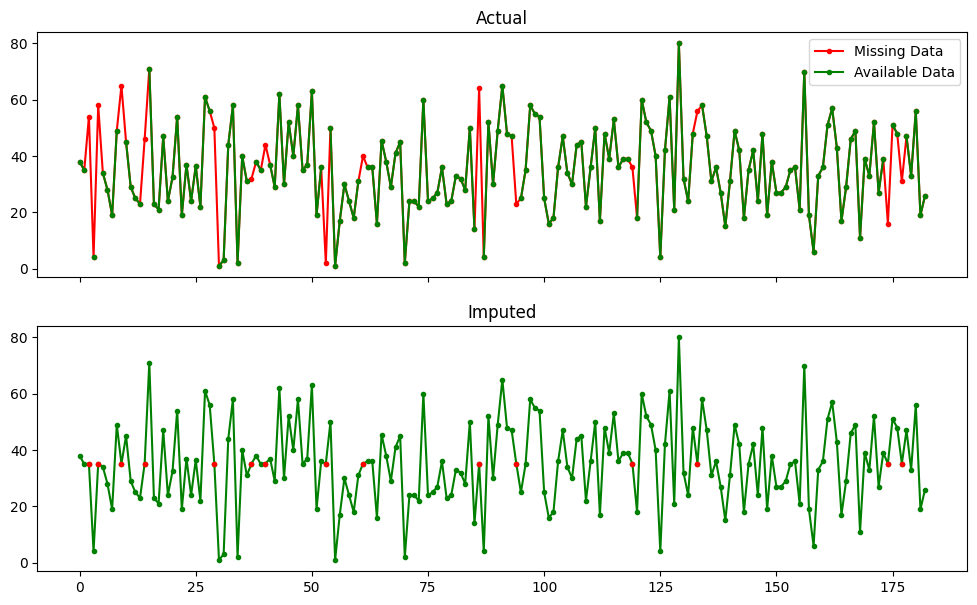

In [127]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 7))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_original['Age'].plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df_missing['Age'].plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Imputed -------------------------------
age_imputed.plot(title='Imputed', ax=axes[1], label='Actual', color='green', style=".-")
imputed_value.plot(title='Imputed', ax=axes[1], label='Actual', color='red', style=".")

## Mini Challenge

Replace missing values in 'Age' column using IterativeImputer (mice) and compare the actuals vs imputed using MSE and graph.

Code Link: https://git.io/JzHmh

In [169]:
import pandas as pd
import random

df_original = pd.read_csv('C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/titanic.csv')
df_original = df_original.dropna()
df_original.reset_index(inplace=True)

# Introduce missing values
random.seed(15)

k = 15
na_index = random.sample(range(df_original.shape[0]), k)

# Replace the values corresponding to the index with np.nan
df_missing = df_original.copy()

df_missing.loc[na_index, 'Age'] = np.nan
df_missing.head()
na_index

[53, 2, 133, 9, 40, 61, 4, 14, 174, 37, 177, 94, 29, 86, 119]

In [129]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [130]:
imputer=IterativeImputer(random_state=100)


In [131]:
df_train=df_missing.loc[:,["Survived","Pclass","Fare","Age"]]
df_train.head()
df_imputed=imputer.fit_transform(df_train)
df_original.loc[:,"Age_imputed"]=df_imputed[:,3]
df_original



,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,43.379494
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,4.000000
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,36.943911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,47.000000
179,872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,33.000000
180,879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,56.000000
181,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000


In [132]:
    from sklearn.metrics import mean_squared_error
    error= np.round(mean_squared_error(df_original["Age"][na_index],df_original["Age_imputed"][na_index]),2)
    error

293.18

#### Solution

In [151]:
# need to enable iterative imputer explicitly since its still experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define imputer
imputer = IterativeImputer(random_state=100)

df_train = df_missing.loc[:, ["Survived", "Pclass", "Fare", 'Age']]
df_train.head()

# fit on the dataset
imputer.fit(df_train)
df_imputed = imputer.transform(df_train)
df_original.loc[:, ['Age_imputed']] = df_imputed[:, 3]
df_original.head(10)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
2,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,43.379494
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,4.000000
4,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,36.943911
5,21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,34.000000
6,23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,28.000000
7,27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,19.000000
8,52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000
9,54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,43.011926


__MSE__

In [134]:
# Compute the mean squared error
from sklearn.metrics import mean_squared_error

error = np.round(mean_squared_error(df_original['Age'][na_index], df_original['Age_imputed'][na_index]), 2)
error

293.18

__Plot__

0      38.000000
1      35.000000
2      35.187024
3       4.000000
4      35.187024
         ...    
178    47.000000
179    33.000000
180    56.000000
181    19.000000
182    26.000000
Name: Age, Length: 183, dtype: float64

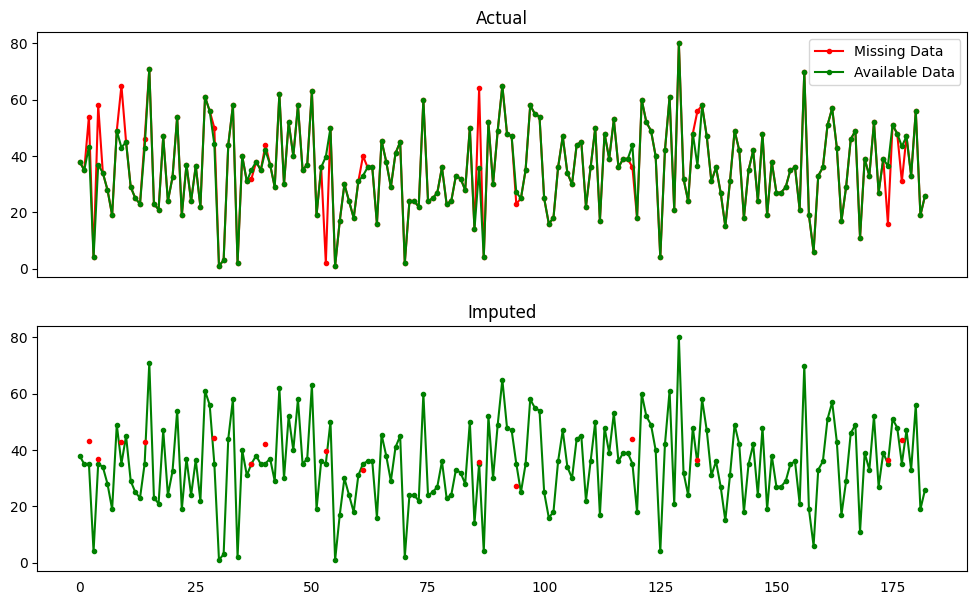

In [160]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 7))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_original['Age'].plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df_original['Age_imputed'].plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Imputed -------------------------------
age_imputed.plot(title='Imputed', ax=axes[1], label='Actual', color='green', style=".-")
df_original['Age_imputed'][na_index].plot(title='Imputed', ax=axes[1], label='Actual', color='red', style=".")
age_imputed

<Axes: title={'center': 'Imputed'}>

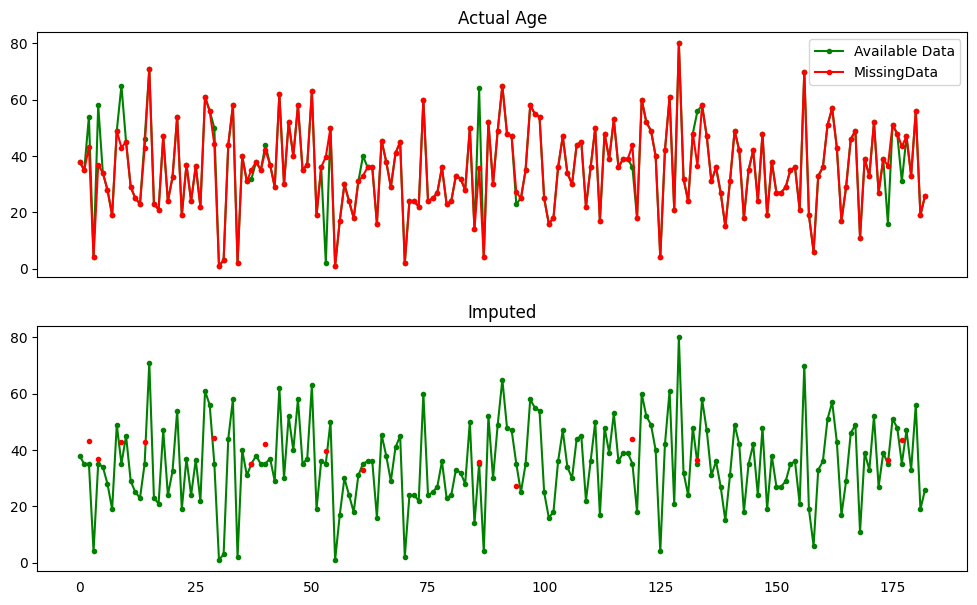

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes= plt.subplots(2,1,figsize=(12,7),sharex=True)
plt.rcParams.update({'xtick.bottom' : False})
df_original["Age"].plot(ax=axes[0],title="Actual Age",label="Actual",style=".-",color="Green")
df_original["Age_imputed"].plot(ax=axes[0],title="Actual Age",label="Actual",style=".-",color="Red")
axes[0].legend(["Available Data","MissingData"])

age_imputed.plot(title='Imputed', ax=axes[1], label='Actual', color='green', style=".-")
df_original['Age_imputed'][na_index].plot(title='Imputed', ax=axes[1], label='Actual', color='red', style=".")
